In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
# Read Files
df = pd.read_excel('data3.xlsx')

# Separate the features (X) and target variable (y)
X = df.drop('DroppedOut', axis=1)
y = df['DroppedOut']
# Convert y to a numpy array
y = np.array(y)

# Perform z-score normalization on the features 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [57]:
# Lists to store the metrics of each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)

# Train an XGBoost classifier on each fold
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

for train_index, test_index in skf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the XGBoost classifier
    xgb.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = xgb.predict(X_test)
    
    # Compute the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Compute the metrics and store them in the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

In [58]:
# Print the confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", cm)
    
# Compute the macro averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Model Accuracy:", np.mean(accuracies))
print("Weighted Average Precision:", np.mean(precisions))
print("Weighted Average Recall:", np.mean(recalls))
print("Weighted Average F1-score:", np.mean(f1_scores))
print("Macro Average Precision:", macro_precision)
print("Macro Average Recall:", macro_recall)
print("Macro Average F1-score:", macro_f1)

Confusion matrix for fold 1:
 [[181  10]
 [ 16  62]]
Confusion matrix for fold 2:
 [[175  16]
 [  8  70]]
Confusion matrix for fold 3:
 [[173  17]
 [ 15  64]]
Confusion matrix for fold 4:
 [[183   7]
 [ 14  65]]
Confusion matrix for fold 5:
 [[177  13]
 [ 15  64]]
Confusion matrix for fold 6:
 [[170  20]
 [ 10  69]]
Confusion matrix for fold 7:
 [[177  13]
 [  7  71]]
Confusion matrix for fold 8:
 [[176  14]
 [ 16  62]]
Model Accuracy: 0.9018649780835599
Weighted Average Precision: 0.9032034289178553
Weighted Average Recall: 0.9018649780835599
Weighted Average F1-score: 0.9020060132255279
Macro Average Precision: 0.8662280701754386
Macro Average Recall: 0.8605937921727396
Macro Average F1-score: 0.8633303868905963


In [59]:
# Get feature importances
feature_importances = xgb.feature_importances_

# Create a DataFrame of features and their importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(features_df)

                              Feature  Importance
26                 NumPassedWorkshops    0.257576
18    ContinuousAbsenceSinceLastLogin    0.163295
36                NumPassedMasterlabs    0.045758
28     NumWorkshopsWithNullPassStatus    0.043600
44                     MasterlabStars    0.037070
21           NumOfPendingSLActivities    0.033770
34                      WorkshopStars    0.026294
15                   MHLearningSchool    0.021955
2                      PrioritySchool    0.018750
27              NumWithdrawnWorkshops    0.017969
30      AttendedWorkshopSessionsCount    0.017813
33   NotRecordedWorkshopSessionsCount    0.017152
22          NumOfRejectedSLActivities    0.016972
5                  SocioeconomicScore    0.015968
9                MHNeurodevelopmental    0.015926
40     AttendedMasterlabSessionsCount    0.015782
43  NotRecordedMasterlabSessionsCount    0.015425
0                   AgeAtregistration    0.015381
31   NotAttendedWorkshopSessionsCount    0.014614


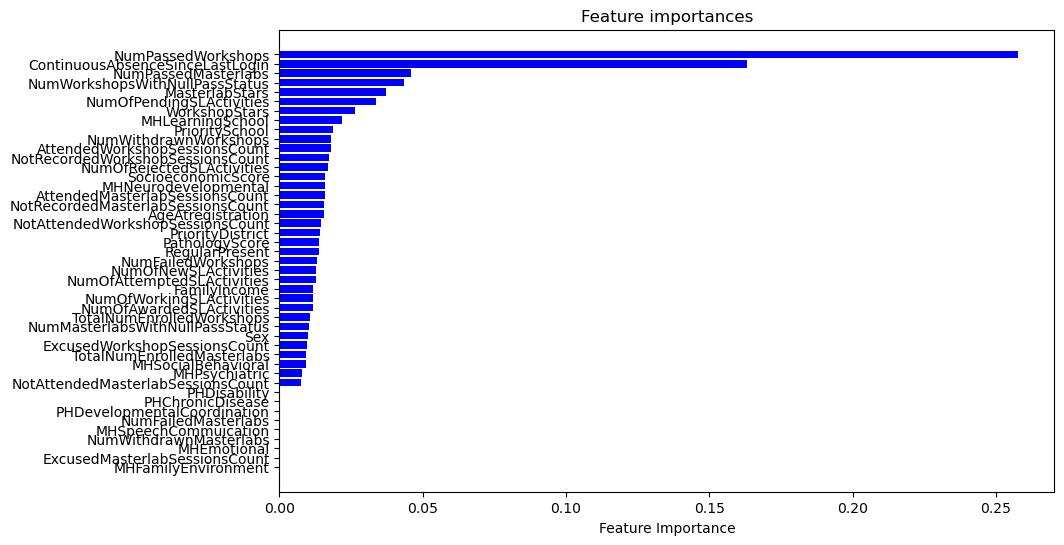

In [60]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(features_df['Feature'], features_df['Importance'], color='b', align='center')
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig('../visualizations/featureimp-xg-boost.png', bbox_inches='tight')

plt.show()

In [41]:
# Select the top 10 features
top_features = features_df['Feature'][:25]

# Select only the top features from X
X_top_features = X[top_features]
X_normalized = scaler.fit_transform(X_top_features)

# Lists to store the metrics of each fold
confusion_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform stratified K-fold cross-validation with 8 folds
skf = StratifiedKFold(n_splits=8)

# Train an XGBoost classifier on each fold
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

for train_index, test_index in skf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the XGBoost classifier
    xgb.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = xgb.predict(X_test)
    
    # Compute the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)
    
    # Compute the metrics and store them in the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

In [17]:
# Print the confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i+1}:\n", cm)
    
# Compute the macro averages
macro_precision = precision_score(y_test, y_pred, average='macro')
macro_recall = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics
print("Model Accuracy:", np.mean(accuracies))
print("Weighted Average Precision:", np.mean(precisions))
print("Weighted Average Recall:", np.mean(recalls))
print("Weighted Average F1-score:", np.mean(f1_scores))
print("Macro Average Precision:", macro_precision)
print("Macro Average Recall:", macro_recall)
print("Macro Average F1-score:", macro_f1)

Confusion matrix for fold 1:
 [[146  18]
 [ 11  46]]
Confusion matrix for fold 2:
 [[149  15]
 [  6  51]]
Confusion matrix for fold 3:
 [[152  12]
 [ 19  38]]
Confusion matrix for fold 4:
 [[158   6]
 [ 13  44]]
Confusion matrix for fold 5:
 [[153  11]
 [ 16  41]]
Confusion matrix for fold 6:
 [[151  13]
 [  9  48]]
Confusion matrix for fold 7:
 [[151  13]
 [  8  49]]
Confusion matrix for fold 8:
 [[151  13]
 [ 10  46]]
Model Accuracy: 0.890777972027972
Weighted Average Precision: 0.8926343671397289
Weighted Average Recall: 0.890777972027972
Weighted Average F1-score: 0.8908772099554384
Macro Average Precision: 0.8587746078534583
Macro Average Recall: 0.8710801393728222
Macro Average F1-score: 0.8646153846153847


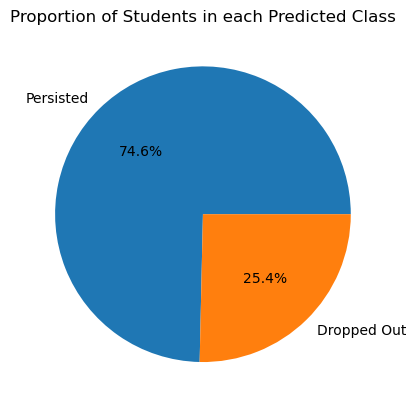

In [13]:
import matplotlib.pyplot as plt

# Count the number of students in each class
class_counts = df['DroppedOut'].value_counts()

# Change the class labels
class_counts.index = ['Persisted', 'Dropped Out']

# Create a pie chart of the counts
class_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Proportion of Students in each Predicted Class')
plt.ylabel('')  # This line removes the y-axis label for the pie chart

# Save the figure
plt.savefig('pie_chart.png', bbox_inches='tight')

plt.show()


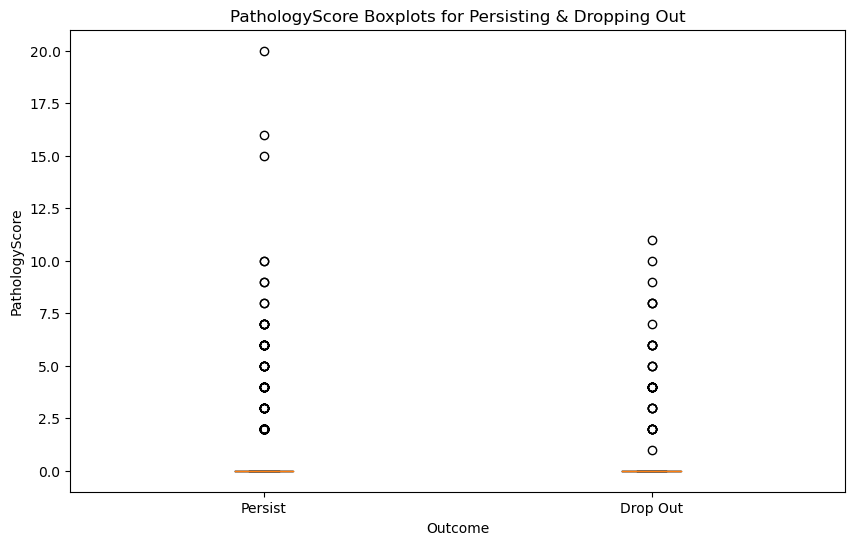

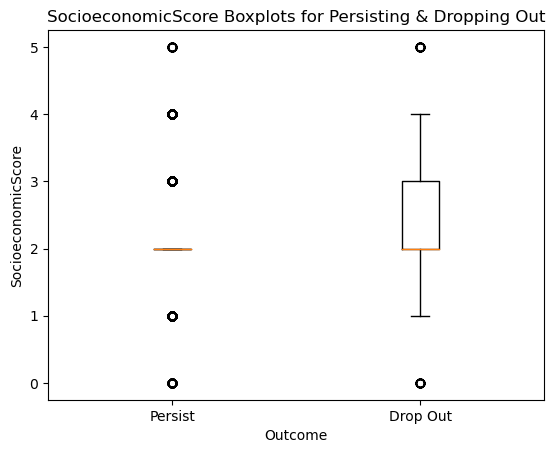

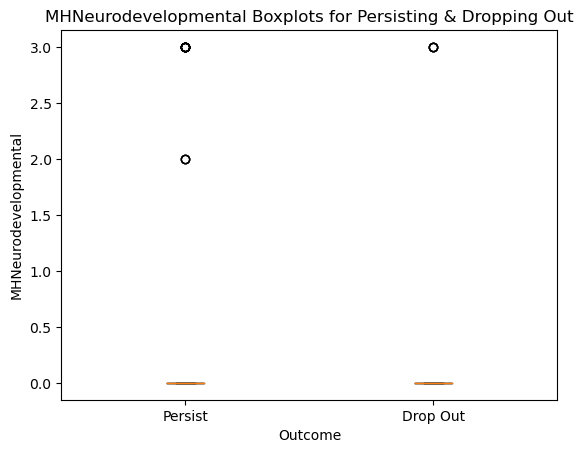

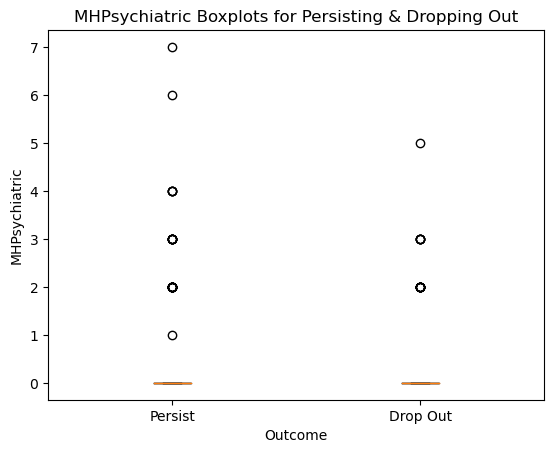

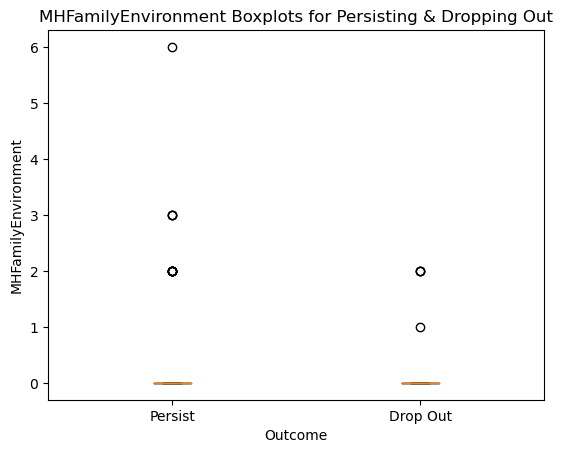

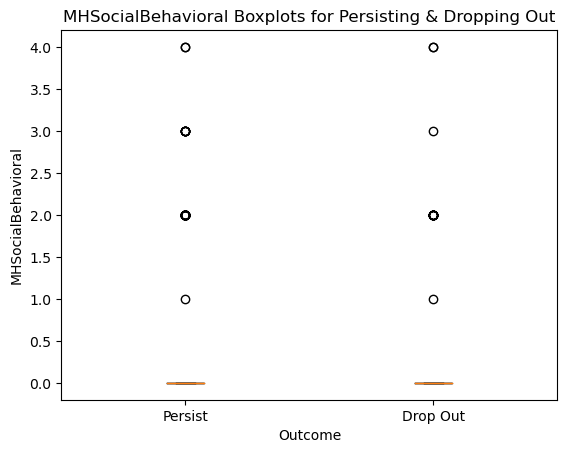

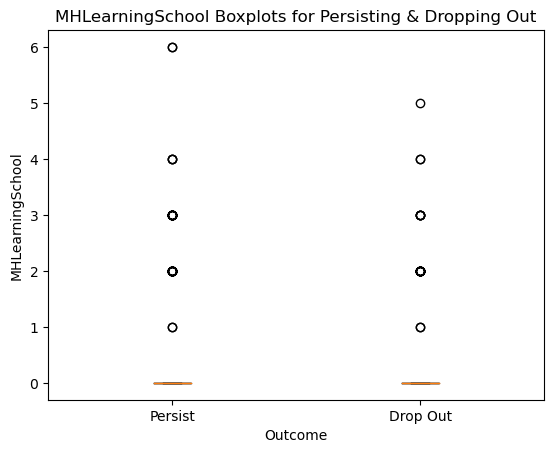

In [248]:
significant_features = ['PathologyScore', 'SocioeconomicScore', 'MHNeurodevelopmental', 'MHPsychiatric', 'MHFamilyEnvironment', 'MHSocialBehavioral', 'MHLearningSchool']

# Create boxplots of the significant features for each class
plt.figure(figsize=(10, 6))
for feature in significant_features:
    plt.boxplot([X.loc[y == 0, feature], X.loc[y == 1, feature]], labels=['Persist', 'Drop Out'])
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.title(f'{feature} Boxplots for Persisting & Dropping Out')
    plt.show()

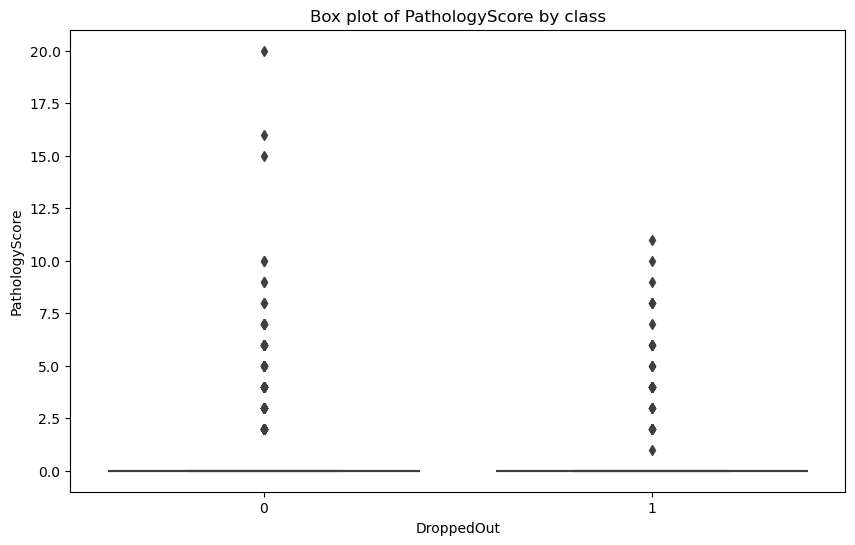

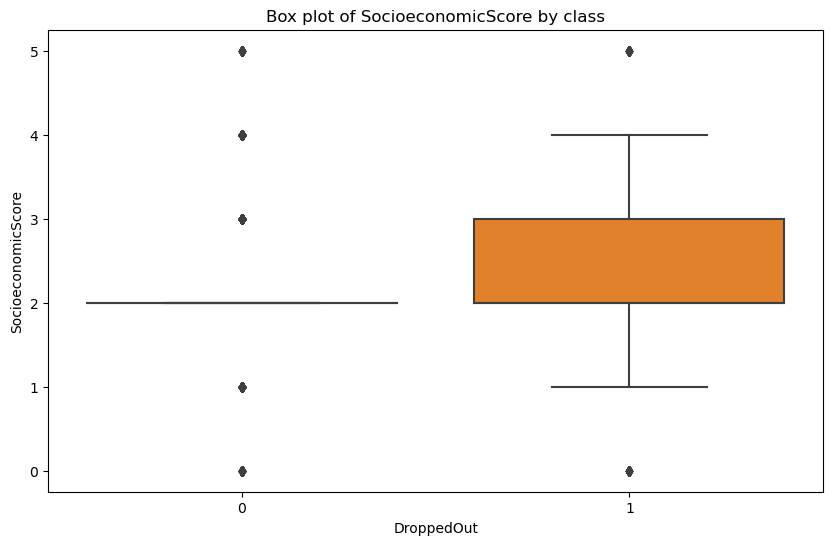

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ['PathologyScore', 'SocioeconomicScore']  # replace with your features

# For each feature, we create a separate box plot for each class
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='DroppedOut', y=feature, data=df)
    plt.title('Box plot of {} by class'.format(feature))
    plt.show()